## Logistic Regression - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

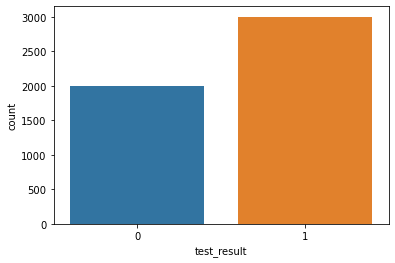

In [7]:
sns.countplot(data=df, x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

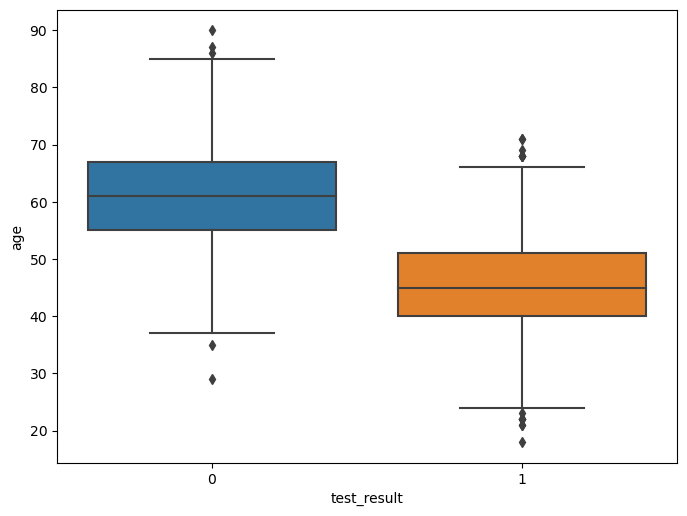

In [8]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(data=df, x='test_result', y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

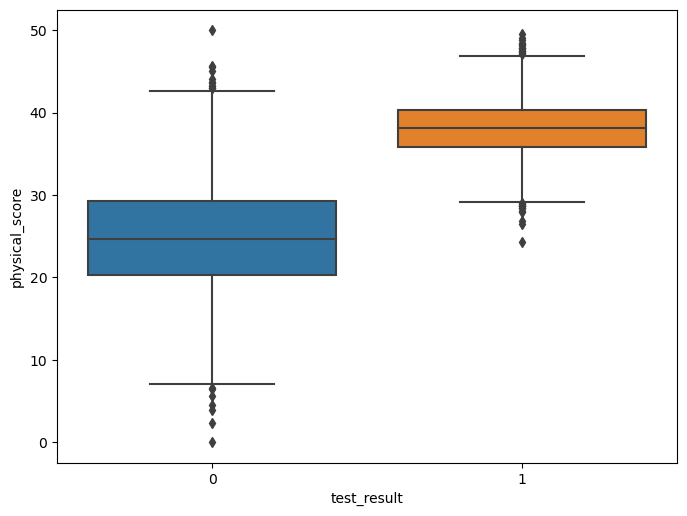

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(data=df, x='test_result', y='physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

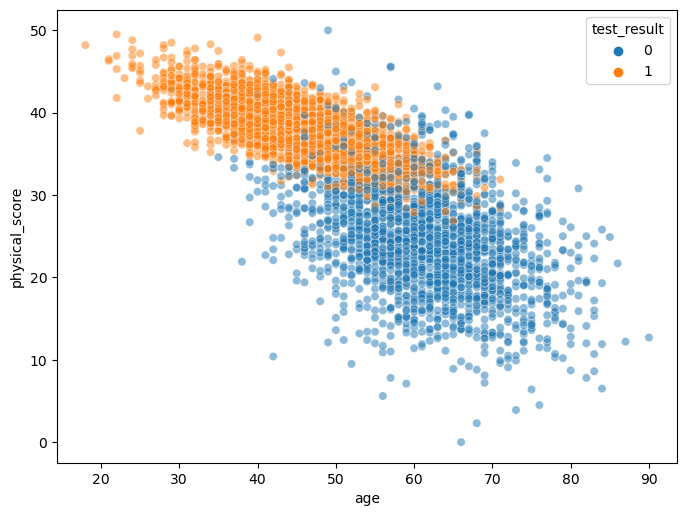

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

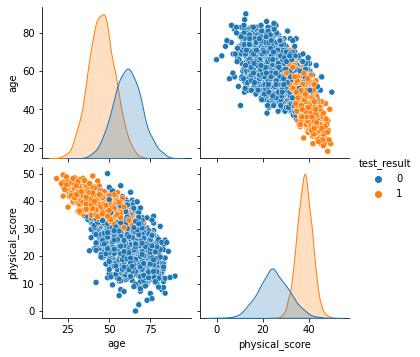

In [11]:
sns.pairplot(data=df, hue='test_result')

<AxesSubplot:>

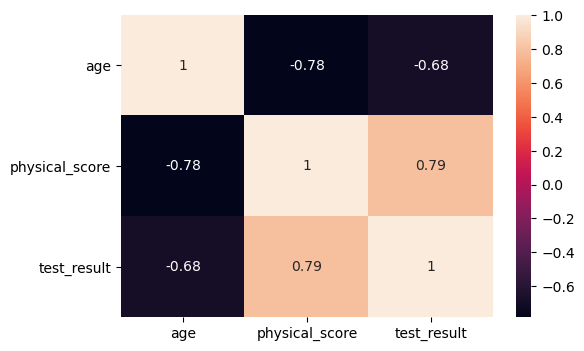

In [12]:
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

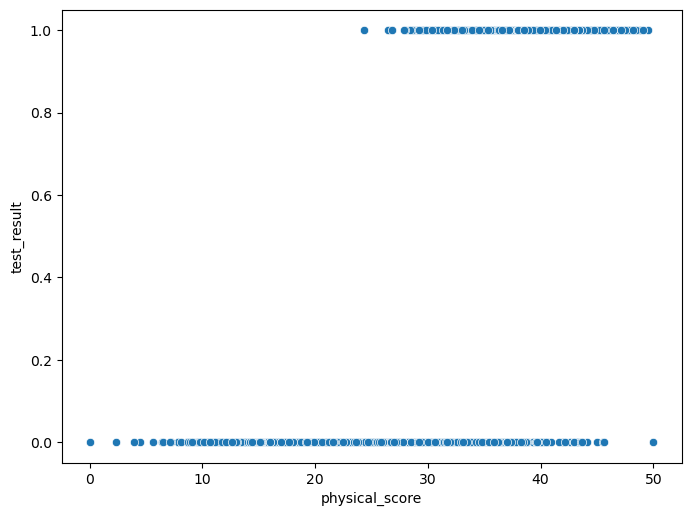

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=df, x='physical_score', y='test_result')

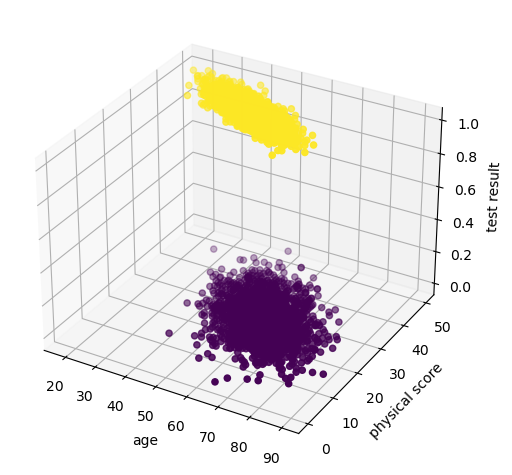

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('age')
ax.set_ylabel('physical score')
ax.set_zlabel('test result')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

## Model Training

In [15]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [16]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg_model = LogisticRegression()

In [24]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
log_reg_model.coef_

array([[-0.94953524,  3.45991194]])

In [26]:
test_pred = log_reg_model.predict(X_test)

# Performance Evaluation

In [27]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
accuracy_score(y_test, test_pred)

0.93

In [30]:
log_reg_model.score(X_test, y_test)

0.93

In [31]:
TP = ((test_pred == 1) & (y_test == 1)).sum()
TN = ((test_pred == 0) & (y_test == 0)).sum()
FP = ((test_pred == 1) & (y_test == 0)).sum()
FN = ((test_pred == 0) & (y_test == 1)).sum()

In [32]:
acc = (TP + TN) / (TP + FN + TN + FP)

In [33]:
acc

0.93

In [34]:
con_matr = confusion_matrix(y_test, test_pred)

In [35]:
con_matr

array([[172,  21],
       [ 14, 293]])

In [36]:
acc = (con_matr[1, 1] + con_matr[0, 0]) / (con_matr.sum())

In [37]:
acc

0.93

In [38]:
from sklearn.metrics import plot_confusion_matrix

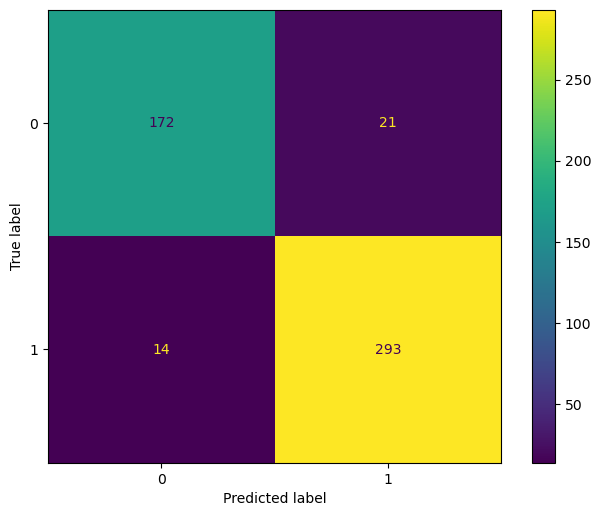

In [39]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

plot_confusion_matrix(estimator=log_reg_model, X=X_test, y_true=y_test, ax=ax)

In [40]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
precision_score(y_test, test_pred)

0.9331210191082803

In [43]:
recall_score(y_test, test_pred)

0.9543973941368078

In [44]:
f1_score(y_test, test_pred)

0.9436392914653785

In [45]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

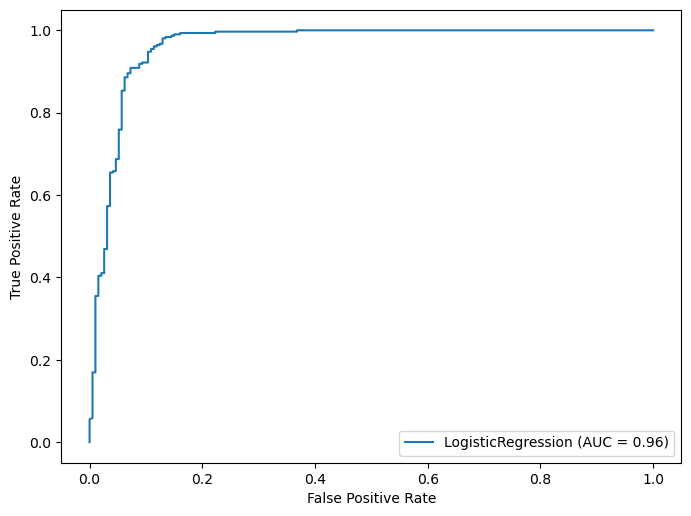

In [46]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plot_roc_curve(estimator=log_reg_model, X=X_test, y=y_test, ax=ax)

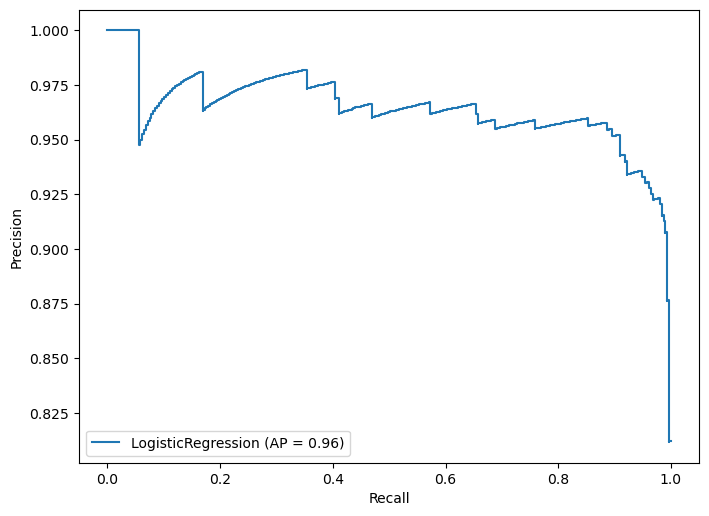

In [47]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plot_precision_recall_curve(log_reg_model, X_test, y_test, ax=ax)

In [48]:
log_reg_model.predict_proba(X_test)[0]

array([0.02384343, 0.97615657])

In [49]:
y_test[0]

1

## Multi-Class Classification with Logistic Regression

In [50]:
df = pd.read_csv('../DATA/iris.csv')

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

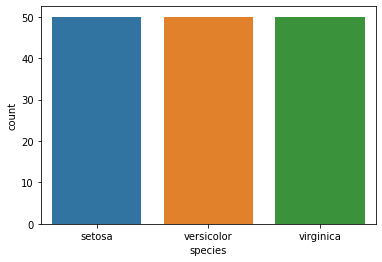

In [55]:
sns.countplot(data=df, x='species')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

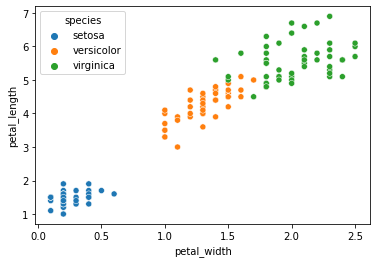

In [56]:
sns.scatterplot(data=df, x='petal_width', y='petal_length', hue='species')

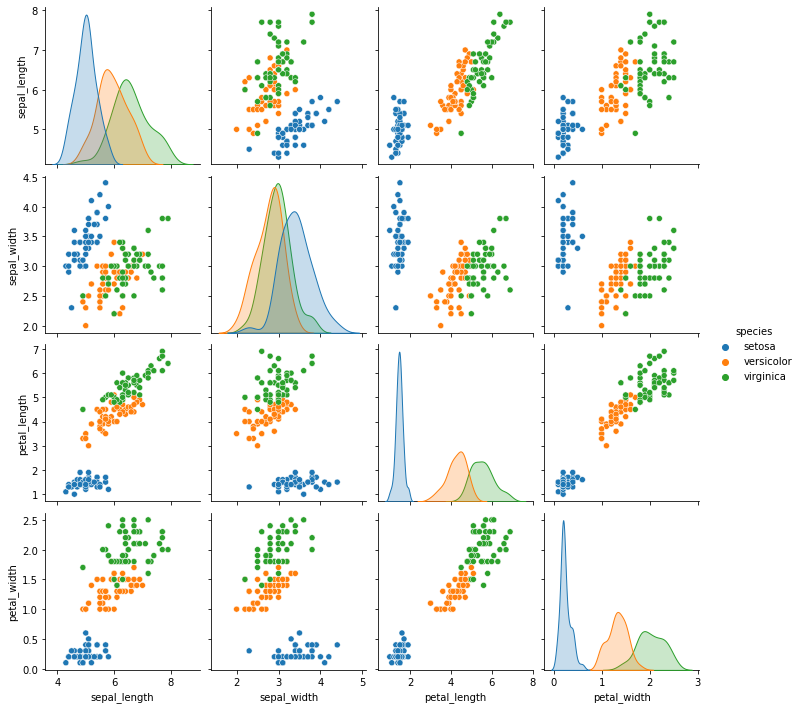

In [57]:
sns.pairplot(data=df, hue='species')

In [58]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

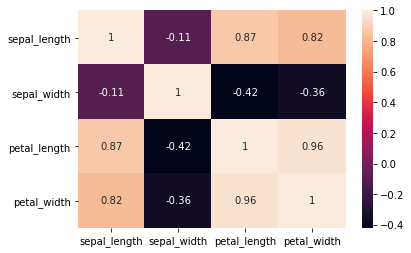

In [59]:
sns.heatmap(df.corr(), annot=True)

In [60]:
X = df.drop('species', axis=1)
y = df['species']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
from sklearn.model_selection import GridSearchCV

In [105]:
log_model = LogisticRegression(multi_class='ovr', solver='saga', max_iter=5000)

In [106]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 
              'l1_ratio': np.linspace(0, 1, 20), 
              'C': np.logspace(0, 10, 20)}

In [107]:
grid_cv_model = GridSearchCV(estimator=log_model, param_grid=param_grid)

In [108]:
grid_cv_model.fit(X_train, y_train)

/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/alllowd/anaconda3/envs/python_ml_datascience_learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [110]:
grid_cv_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [116]:
test_pred = grid_cv_model.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [126]:
accuracy_score(y_test, test_pred)

0.9736842105263158

In [127]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [128]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

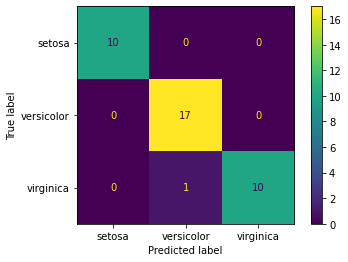

In [129]:
plot_confusion_matrix(estimator=grid_cv_model, X=X_test, y_true=y_test)

In [150]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

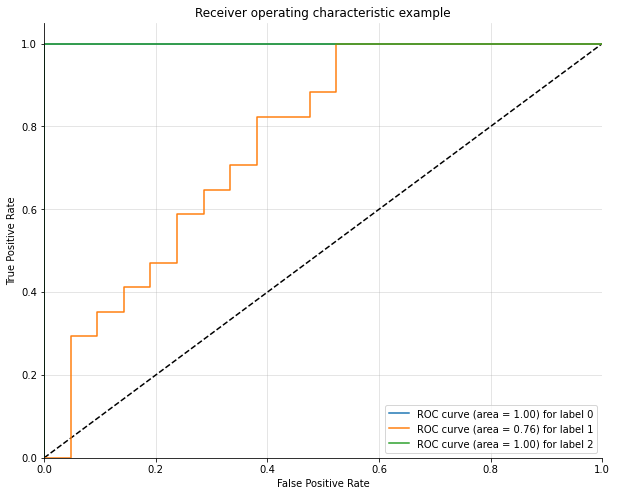

In [154]:
plot_multiclass_roc(grid_cv_model, X_test, y_test, 3, figsize=(10, 8))